# Описание услуг

Оператор предоставляет два основных типа услуг:    

1. Стационарную телефонную связь. Возможно подключение телефонного аппарата к нескольким линиям одновременно.     
2. Интернет. Подключение может быть двух типов: через телефонную линию (DSL*,* от англ. *digital subscriber line*, «цифровая абонентская линия») или оптоволоконный кабель (*Fiber optic*).       

Также доступны такие услуги:     

- Интернет-безопасность: антивирус (*DeviceProtection*) и блокировка небезопасных сайтов (*OnlineSecurity*);      
- Выделенная линия технической поддержки (*TechSupport*);      
- Облачное хранилище файлов для резервного копирования данных (*OnlineBackup*);      
- Стриминговое телевидение (*StreamingTV*) и каталог фильмов (*StreamingMovies*).      

За услуги клиенты могут платить каждый месяц или заключить договор на 1–2 года. Доступны различные способы расчёта и возможность получения электронного чека.    

# Шаг 1. Предобработка данных

# Шаг 1.1 Анализ данных

In [1]:
#импортируем необходимые библиотеки
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from datetime import timedelta
from datetime import datetime
from matplotlib import pyplot

In [2]:
#загружаем данные из таблицы - contract
contract = pd.read_csv('/datasets/final_provider/contract.csv')

In [3]:
#визуальный анализ загруженных данных
contract.info()
display(contract.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
customerID          7043 non-null object
BeginDate           7043 non-null object
EndDate             7043 non-null object
Type                7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65
5,9305-CDSKC,2019-03-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,99.65,820.5
6,1452-KIOVK,2018-04-01,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4
7,6713-OKOMC,2019-04-01,No,Month-to-month,No,Mailed check,29.75,301.9
8,7892-POOKP,2017-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,104.80,3046.05
9,6388-TABGU,2014-12-01,No,One year,No,Bank transfer (automatic),56.15,3487.95


In [4]:
#создаем копию столбца, для дальнейшего редактирования
contract['EndDate_red'] = contract['EndDate']

In [5]:
#функция по замене значений NO на дату выгрузки данных в столбце - EndDate_red
def read_end_date(table):
    for j in range (len(table)):
        if table[j] == 'No':
            table[j] = '2020-02-01 00:00:00'
    return table

In [6]:
#заменяем значения в столбце - EndDate_red
contract['EndDate_red'] = read_end_date(contract['EndDate_red'])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [7]:
#приводим значение в нужный формате в столбце EndDate_red и BeginDate
contract['EndDate_red'] = pd.to_datetime(contract['EndDate_red'], format = '%Y.%m', errors = 'coerce')
contract['BeginDate'] = pd.to_datetime(contract['BeginDate'], format = '%Y.%m')

In [8]:
#определяем жизненный цикл клиента (в месяцах)
contract['TermOfCooperation'] = ((contract.EndDate_red - contract.BeginDate)/np.timedelta64(1, 'M'))
contract['TermOfCooperation'] = contract['TermOfCooperation'].astype(int)

In [9]:
#удаляем созданный ранее столбец - EndDate_red
contract = contract.drop(['EndDate_red'], axis = 1)

In [10]:
#функция по замене значений в столбце - EndDate
def read_end(table):
    for j in range (len(table)):
        if table[j] != 'No':
            table[j] = 'Yes'
    return table

In [11]:
#заменяем значения в столбце - EndDate
contract['EndDate'] = read_end(contract['EndDate'])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [12]:
#изменяем название столбца - EndDate на ChurnCustomer
contract.rename(columns={'EndDate': 'ChurnCustomer'}, inplace=True)

In [13]:
#найден пропуск в столбце - TotalCharges
contract['TotalCharges'].min()

' '

In [14]:
#изменяем тип данных в столбце - TotalCharges
contract['TotalCharges'] = pd.to_numeric(contract['TotalCharges'], errors='coerce')

In [15]:
#анализ по дубликатом и пропущенным значениям
print('Кол-во дубликатов в индетификаторе клиента -', contract['customerID'].duplicated().sum(), 'шт')
print('Кол-во пропущенных значений в каждом столбце:') 
contract.isnull().sum()

Кол-во дубликатов в индетификаторе клиента - 0 шт
Кол-во пропущенных значений в каждом столбце:


customerID            0
BeginDate             0
ChurnCustomer         0
Type                  0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges         11
TermOfCooperation     0
dtype: int64

In [16]:
#удаляем пропуски 
contract = contract.dropna()

In [17]:
#проверка после удаления
print('Кол-во дубликатов в индетификаторе клиента -', contract['customerID'].duplicated().sum(), 'шт')
print('Кол-во пропущенных значений в каждом столбце:') 
contract.isnull().sum()

Кол-во дубликатов в индетификаторе клиента - 0 шт
Кол-во пропущенных значений в каждом столбце:


customerID           0
BeginDate            0
ChurnCustomer        0
Type                 0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges         0
TermOfCooperation    0
dtype: int64

In [18]:
#визуальный анализ данных после применения функции
contract.info()
display(contract.head(10))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 9 columns):
customerID           7032 non-null object
BeginDate            7032 non-null datetime64[ns]
ChurnCustomer        7032 non-null object
Type                 7032 non-null object
PaperlessBilling     7032 non-null object
PaymentMethod        7032 non-null object
MonthlyCharges       7032 non-null float64
TotalCharges         7032 non-null float64
TermOfCooperation    7032 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 549.4+ KB


,customerID,BeginDate,ChurnCustomer,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,TermOfCooperation
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,1
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.50,34
2,3668-QPYBK,2019-10-01,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,2
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,45
4,9237-HQITU,2019-09-01,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,2
5,9305-CDSKC,2019-03-01,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,8
6,1452-KIOVK,2018-04-01,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,22
7,6713-OKOMC,2019-04-01,No,Month-to-month,No,Mailed check,29.75,301.90,10
8,7892-POOKP,2017-07-01,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,28
9,6388-TABGU,2014-12-01,No,One year,No,Bank transfer (automatic),56.15,3487.95,62


In [19]:
#загружаем данные из таблицы - internet
internet = pd.read_csv('/datasets/final_provider/internet.csv')

In [20]:
#визуальный анализ загруженных данных
internet.info()
display(internet.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
customerID          5517 non-null object
InternetService     5517 non-null object
OnlineSecurity      5517 non-null object
OnlineBackup        5517 non-null object
DeviceProtection    5517 non-null object
TechSupport         5517 non-null object
StreamingTV         5517 non-null object
StreamingMovies     5517 non-null object
dtypes: object(8)
memory usage: 344.9+ KB


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No
5,9305-CDSKC,Fiber optic,No,No,Yes,No,Yes,Yes
6,1452-KIOVK,Fiber optic,No,Yes,No,No,Yes,No
7,6713-OKOMC,DSL,Yes,No,No,No,No,No
8,7892-POOKP,Fiber optic,No,No,Yes,Yes,Yes,Yes
9,6388-TABGU,DSL,Yes,Yes,No,No,No,No


In [21]:
#анализ по дубликатом и пропущенным значениям
print('Кол-во дубликатов в индетификаторе клиента -', internet['customerID'].duplicated().sum(), 'шт')
print('Кол-во пропущенных значений в каждом столбце:') 
internet.isnull().sum()

Кол-во дубликатов в индетификаторе клиента - 0 шт
Кол-во пропущенных значений в каждом столбце:


customerID          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

In [22]:
#загружаем данные из таблицы - personal
personal = pd.read_csv('/datasets/final_provider/personal.csv')

In [23]:
#визуальный анализ загруженных данных
personal.info()
display(personal.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
customerID       7043 non-null object
gender           7043 non-null object
SeniorCitizen    7043 non-null int64
Partner          7043 non-null object
Dependents       7043 non-null object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No
5,9305-CDSKC,Female,0,No,No
6,1452-KIOVK,Male,0,No,Yes
7,6713-OKOMC,Female,0,No,No
8,7892-POOKP,Female,0,Yes,No
9,6388-TABGU,Male,0,No,Yes


In [24]:
#анализ по дубликатом и пропущенным значениям
print('Кол-во дубликатов в индетификаторе клиента -', personal['customerID'].duplicated().sum(), 'шт')
print('Кол-во пропущенных значений в каждом столбце:') 
personal.isnull().sum()

Кол-во дубликатов в индетификаторе клиента - 0 шт
Кол-во пропущенных значений в каждом столбце:


customerID       0
gender           0
SeniorCitizen    0
Partner          0
Dependents       0
dtype: int64

In [25]:
#загружаем данные из таблицы - phone
phone = pd.read_csv('/datasets/final_provider/phone.csv')

In [26]:
#визуальный анализ загруженных данных
phone.info()
display(phone.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
customerID       6361 non-null object
MultipleLines    6361 non-null object
dtypes: object(2)
memory usage: 99.5+ KB


,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes
5,7892-POOKP,Yes
6,6388-TABGU,No
7,9763-GRSKD,No
8,7469-LKBCI,No
9,8091-TTVAX,Yes


In [27]:
#анализ по дубликатом и пропущенным значениям
print('Кол-во дубликатов в индетификаторе клиента -', phone['customerID'].duplicated().sum(), 'шт')
print('Кол-во пропущенных значений в каждом столбце:') 
phone.isnull().sum()

Кол-во дубликатов в индетификаторе клиента - 0 шт
Кол-во пропущенных значений в каждом столбце:


customerID       0
MultipleLines    0
dtype: int64

# Шаг 1.1 Выводы

1) В столбце "TotalCharges" были однаружены значения - ' '. Всего таких значений было 11, значения в столбце переведены в float64 и строки с ' ' - удалены (так как их всего лишь было 11 штук).  
2) Можем приступать к слиянию датасетов и подготовке одной общей таблице.    
3) Был добавлен новый столбец со сроком жизни клиента - на момент отвала клиента для клиентов, которые ушли и на момент 01 февраля 2020 года для действующих клиентов.  
4) Столбец EndDate был переименован в ChurnCustomer, так как изменил значения в столбце и старое название столбца перестало быть "говорящим")

# Шаг 1.2 Слияние датасетов

In [28]:
#слияние первых двух таблиц: personal + contract
per_con = personal.merge(contract, on='customerID', how='right')

In [29]:
#визуальный анализ таблицы: personal + contract
per_con.info()
display(per_con.head(10))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7031
Data columns (total 13 columns):
customerID           7032 non-null object
gender               7032 non-null object
SeniorCitizen        7032 non-null int64
Partner              7032 non-null object
Dependents           7032 non-null object
BeginDate            7032 non-null datetime64[ns]
ChurnCustomer        7032 non-null object
Type                 7032 non-null object
PaperlessBilling     7032 non-null object
PaymentMethod        7032 non-null object
MonthlyCharges       7032 non-null float64
TotalCharges         7032 non-null float64
TermOfCooperation    7032 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(2), object(8)
memory usage: 769.1+ KB


,customerID,gender,SeniorCitizen,Partner,Dependents,BeginDate,ChurnCustomer,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,TermOfCooperation
0,7590-VHVEG,Female,0,Yes,No,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,1
1,5575-GNVDE,Male,0,No,No,2017-04-01,No,One year,No,Mailed check,56.95,1889.50,34
2,3668-QPYBK,Male,0,No,No,2019-10-01,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,2
3,7795-CFOCW,Male,0,No,No,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,45
4,9237-HQITU,Female,0,No,No,2019-09-01,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,2
5,9305-CDSKC,Female,0,No,No,2019-03-01,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,8
6,1452-KIOVK,Male,0,No,Yes,2018-04-01,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,22
7,6713-OKOMC,Female,0,No,No,2019-04-01,No,Month-to-month,No,Mailed check,29.75,301.90,10
8,7892-POOKP,Female,0,Yes,No,2017-07-01,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,28
9,6388-TABGU,Male,0,No,Yes,2014-12-01,No,One year,No,Bank transfer (automatic),56.15,3487.95,62


In [30]:
#слияние полученной таблице ранее и таблицы phone: (personal + contract) + phone
per_con_phone = per_con.merge(phone, on='customerID', how='left')

In [31]:
#визуальный анализ таблицы: (personal + contract) + phone
per_con_phone.info()
display(per_con_phone.head(10))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7031
Data columns (total 14 columns):
customerID           7032 non-null object
gender               7032 non-null object
SeniorCitizen        7032 non-null int64
Partner              7032 non-null object
Dependents           7032 non-null object
BeginDate            7032 non-null datetime64[ns]
ChurnCustomer        7032 non-null object
Type                 7032 non-null object
PaperlessBilling     7032 non-null object
PaymentMethod        7032 non-null object
MonthlyCharges       7032 non-null float64
TotalCharges         7032 non-null float64
TermOfCooperation    7032 non-null int64
MultipleLines        6352 non-null object
dtypes: datetime64[ns](1), float64(2), int64(2), object(9)
memory usage: 824.1+ KB


,customerID,gender,SeniorCitizen,Partner,Dependents,BeginDate,ChurnCustomer,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,TermOfCooperation,MultipleLines
0,7590-VHVEG,Female,0,Yes,No,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,1,NaN
1,5575-GNVDE,Male,0,No,No,2017-04-01,No,One year,No,Mailed check,56.95,1889.50,34,No
2,3668-QPYBK,Male,0,No,No,2019-10-01,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,2,No
3,7795-CFOCW,Male,0,No,No,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,45,NaN
4,9237-HQITU,Female,0,No,No,2019-09-01,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,2,No
5,9305-CDSKC,Female,0,No,No,2019-03-01,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,8,Yes
6,1452-KIOVK,Male,0,No,Yes,2018-04-01,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,22,Yes
7,6713-OKOMC,Female,0,No,No,2019-04-01,No,Month-to-month,No,Mailed check,29.75,301.90,10,NaN
8,7892-POOKP,Female,0,Yes,No,2017-07-01,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,28,Yes
9,6388-TABGU,Male,0,No,Yes,2014-12-01,No,One year,No,Bank transfer (automatic),56.15,3487.95,62,No


In [32]:
#функция для подставноке значения в новый столбец
def phone_no(row):
    if row['MultipleLines'] == 'Yes' or row['MultipleLines'] == 'No':
        return 'Yes'
    return 'No'

In [33]:
#создание столбца Phone
per_con_phone['Phone'] = per_con_phone.apply(phone_no, axis = 1)

In [34]:
#визуальный анализ данных после применения функции
per_con_phone.info()
display(per_con_phone.head(10))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7031
Data columns (total 15 columns):
customerID           7032 non-null object
gender               7032 non-null object
SeniorCitizen        7032 non-null int64
Partner              7032 non-null object
Dependents           7032 non-null object
BeginDate            7032 non-null datetime64[ns]
ChurnCustomer        7032 non-null object
Type                 7032 non-null object
PaperlessBilling     7032 non-null object
PaymentMethod        7032 non-null object
MonthlyCharges       7032 non-null float64
TotalCharges         7032 non-null float64
TermOfCooperation    7032 non-null int64
MultipleLines        6352 non-null object
Phone                7032 non-null object
dtypes: datetime64[ns](1), float64(2), int64(2), object(10)
memory usage: 879.0+ KB


,customerID,gender,SeniorCitizen,Partner,Dependents,BeginDate,ChurnCustomer,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,TermOfCooperation,MultipleLines,Phone
0,7590-VHVEG,Female,0,Yes,No,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,1,NaN,No
1,5575-GNVDE,Male,0,No,No,2017-04-01,No,One year,No,Mailed check,56.95,1889.50,34,No,Yes
2,3668-QPYBK,Male,0,No,No,2019-10-01,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,2,No,Yes
3,7795-CFOCW,Male,0,No,No,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,45,NaN,No
4,9237-HQITU,Female,0,No,No,2019-09-01,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,2,No,Yes
5,9305-CDSKC,Female,0,No,No,2019-03-01,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,8,Yes,Yes
6,1452-KIOVK,Male,0,No,Yes,2018-04-01,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,22,Yes,Yes
7,6713-OKOMC,Female,0,No,No,2019-04-01,No,Month-to-month,No,Mailed check,29.75,301.90,10,NaN,No
8,7892-POOKP,Female,0,Yes,No,2017-07-01,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,28,Yes,Yes
9,6388-TABGU,Male,0,No,Yes,2014-12-01,No,One year,No,Bank transfer (automatic),56.15,3487.95,62,No,Yes


In [35]:
#заменяем пропущенные значения в столбце - MultipleLines
per_con_phone = per_con_phone.fillna('No')

In [36]:
#визуальный анализ данных после замены пропусков
per_con_phone.info()
display(per_con_phone.head(10))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7031
Data columns (total 15 columns):
customerID           7032 non-null object
gender               7032 non-null object
SeniorCitizen        7032 non-null int64
Partner              7032 non-null object
Dependents           7032 non-null object
BeginDate            7032 non-null datetime64[ns]
ChurnCustomer        7032 non-null object
Type                 7032 non-null object
PaperlessBilling     7032 non-null object
PaymentMethod        7032 non-null object
MonthlyCharges       7032 non-null float64
TotalCharges         7032 non-null float64
TermOfCooperation    7032 non-null int64
MultipleLines        7032 non-null object
Phone                7032 non-null object
dtypes: datetime64[ns](1), float64(2), int64(2), object(10)
memory usage: 879.0+ KB


,customerID,gender,SeniorCitizen,Partner,Dependents,BeginDate,ChurnCustomer,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,TermOfCooperation,MultipleLines,Phone
0,7590-VHVEG,Female,0,Yes,No,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,1,No,No
1,5575-GNVDE,Male,0,No,No,2017-04-01,No,One year,No,Mailed check,56.95,1889.50,34,No,Yes
2,3668-QPYBK,Male,0,No,No,2019-10-01,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,2,No,Yes
3,7795-CFOCW,Male,0,No,No,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,45,No,No
4,9237-HQITU,Female,0,No,No,2019-09-01,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,2,No,Yes
5,9305-CDSKC,Female,0,No,No,2019-03-01,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,8,Yes,Yes
6,1452-KIOVK,Male,0,No,Yes,2018-04-01,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,22,Yes,Yes
7,6713-OKOMC,Female,0,No,No,2019-04-01,No,Month-to-month,No,Mailed check,29.75,301.90,10,No,No
8,7892-POOKP,Female,0,Yes,No,2017-07-01,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,28,Yes,Yes
9,6388-TABGU,Male,0,No,Yes,2014-12-01,No,One year,No,Bank transfer (automatic),56.15,3487.95,62,No,Yes


In [37]:
#слияние полученной таблице ранее и таблицы internet: (personal + contract + phone) + internet
data_full = per_con_phone.merge(internet, on='customerID', how='left')

In [38]:
#визуальный анализ таблицы: (personal + contract + phone) + internet
data_full.info()
display(data_full.head(10))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7031
Data columns (total 22 columns):
customerID           7032 non-null object
gender               7032 non-null object
SeniorCitizen        7032 non-null int64
Partner              7032 non-null object
Dependents           7032 non-null object
BeginDate            7032 non-null datetime64[ns]
ChurnCustomer        7032 non-null object
Type                 7032 non-null object
PaperlessBilling     7032 non-null object
PaymentMethod        7032 non-null object
MonthlyCharges       7032 non-null float64
TotalCharges         7032 non-null float64
TermOfCooperation    7032 non-null int64
MultipleLines        7032 non-null object
Phone                7032 non-null object
InternetService      5512 non-null object
OnlineSecurity       5512 non-null object
OnlineBackup         5512 non-null object
DeviceProtection     5512 non-null object
TechSupport          5512 non-null object
StreamingTV          5512 non-null object
Str

,customerID,gender,SeniorCitizen,Partner,Dependents,BeginDate,ChurnCustomer,Type,PaperlessBilling,PaymentMethod,...,TermOfCooperation,MultipleLines,Phone,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,Female,0,Yes,No,2020-01-01,No,Month-to-month,Yes,Electronic check,...,1,No,No,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,Male,0,No,No,2017-04-01,No,One year,No,Mailed check,...,34,No,Yes,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,Male,0,No,No,2019-10-01,Yes,Month-to-month,Yes,Mailed check,...,2,No,Yes,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,Male,0,No,No,2016-05-01,No,One year,No,Bank transfer (automatic),...,45,No,No,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Female,0,No,No,2019-09-01,Yes,Month-to-month,Yes,Electronic check,...,2,No,Yes,Fiber optic,No,No,No,No,No,No
5,9305-CDSKC,Female,0,No,No,2019-03-01,Yes,Month-to-month,Yes,Electronic check,...,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes
6,1452-KIOVK,Male,0,No,Yes,2018-04-01,No,Month-to-month,Yes,Credit card (automatic),...,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No
7,6713-OKOMC,Female,0,No,No,2019-04-01,No,Month-to-month,No,Mailed check,...,10,No,No,DSL,Yes,No,No,No,No,No
8,7892-POOKP,Female,0,Yes,No,2017-07-01,Yes,Month-to-month,Yes,Electronic check,...,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes
9,6388-TABGU,Male,0,No,Yes,2014-12-01,No,One year,No,Bank transfer (automatic),...,62,No,Yes,DSL,Yes,Yes,No,No,No,No


In [39]:
#полученные пропуски в новой таблице заменяем на 'No'
data_full = data_full.fillna('No')

In [40]:
#удаляем столбец - customerID
data_full = data_full.drop(['customerID', 'BeginDate'], axis = 1)

In [41]:
#визуальный анализ данных после замены пропусков
data_full.info()
display(data_full.head(10))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7031
Data columns (total 20 columns):
gender               7032 non-null object
SeniorCitizen        7032 non-null int64
Partner              7032 non-null object
Dependents           7032 non-null object
ChurnCustomer        7032 non-null object
Type                 7032 non-null object
PaperlessBilling     7032 non-null object
PaymentMethod        7032 non-null object
MonthlyCharges       7032 non-null float64
TotalCharges         7032 non-null float64
TermOfCooperation    7032 non-null int64
MultipleLines        7032 non-null object
Phone                7032 non-null object
InternetService      7032 non-null object
OnlineSecurity       7032 non-null object
OnlineBackup         7032 non-null object
DeviceProtection     7032 non-null object
TechSupport          7032 non-null object
StreamingTV          7032 non-null object
StreamingMovies      7032 non-null object
dtypes: float64(2), int64(2), object(16)
memory usage

,gender,SeniorCitizen,Partner,Dependents,ChurnCustomer,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,TermOfCooperation,MultipleLines,Phone,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,Female,0,Yes,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,1,No,No,DSL,No,Yes,No,No,No,No
1,Male,0,No,No,No,One year,No,Mailed check,56.95,1889.50,34,No,Yes,DSL,Yes,No,Yes,No,No,No
2,Male,0,No,No,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,2,No,Yes,DSL,Yes,Yes,No,No,No,No
3,Male,0,No,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,45,No,No,DSL,Yes,No,Yes,Yes,No,No
4,Female,0,No,No,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,2,No,Yes,Fiber optic,No,No,No,No,No,No
5,Female,0,No,No,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes
6,Male,0,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No
7,Female,0,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,10,No,No,DSL,Yes,No,No,No,No,No
8,Female,0,Yes,No,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes
9,Male,0,No,Yes,No,One year,No,Bank transfer (automatic),56.15,3487.95,62,No,Yes,DSL,Yes,Yes,No,No,No,No


# Шаг 1.2 Выводы

1) Все 4 таблицы были соединены в одну.    
2) При соединении первых двух таблиц - contract + personal, проблем не возникло, так как в каждой таблице было равное кол-во записей.   
3) При соединении таблицы из пункта 2 с таблице phone - появились пустые значения, так как не все абоненты пользуются домашний телефоном. Для разграничения таких абонентов был добавлен новый столбец с назнанием Phone - в нем указывается есть ли у абонента услуга - домашний телефон или нет. Тем абонентам у которых услуги нет, было проставлено значение 'No' в столбце - MultipleLines.   Получаются абоненты у которых не было домашнего телефона обозначались значениями Phone - No и MultipleLines - No.   
4) При соедении таблицы из пункта 3 с таблицей internet - так же появились пустые значения, они были все заменены на 'No', так как пустые значения не подразумевают двухсмысленного значения.    
5) Были удалены два столбца: 'customerID' и 'BeginDate' - они выполнили свое предназначение) (первый помог нам в слиятии таблиц, второй помог нам найти срок 'срок жизни клиента')

# Шаг 1.3 Преобразование данных

In [42]:
cat_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'ChurnCustomer', 'Type', 'PaperlessBilling',
               'PaymentMethod', 'MultipleLines', 'Phone', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
               'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

#преобразование порядковое кодирование
data_full_red = data_full.copy()
encoder = OrdinalEncoder()
encoder.fit(data_full_red[cat_features])
data_full_red[cat_features] = encoder.transform(data_full[cat_features])

In [43]:
#визуальный анализ данных после порядкого кодирования
data_full_red.info()
display(data_full_red.head(10))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7031
Data columns (total 20 columns):
gender               7032 non-null float64
SeniorCitizen        7032 non-null float64
Partner              7032 non-null float64
Dependents           7032 non-null float64
ChurnCustomer        7032 non-null float64
Type                 7032 non-null float64
PaperlessBilling     7032 non-null float64
PaymentMethod        7032 non-null float64
MonthlyCharges       7032 non-null float64
TotalCharges         7032 non-null float64
TermOfCooperation    7032 non-null int64
MultipleLines        7032 non-null float64
Phone                7032 non-null float64
InternetService      7032 non-null float64
OnlineSecurity       7032 non-null float64
OnlineBackup         7032 non-null float64
DeviceProtection     7032 non-null float64
TechSupport          7032 non-null float64
StreamingTV          7032 non-null float64
StreamingMovies      7032 non-null float64
dtypes: float64(19), int64(1)
memor

,gender,SeniorCitizen,Partner,Dependents,ChurnCustomer,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,TermOfCooperation,MultipleLines,Phone,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,29.85,29.85,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50,34,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,3.0,53.85,108.15,2,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,42.30,1840.75,45,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,70.70,151.65,2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,99.65,820.50,8,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0
6,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,89.10,1949.40,22,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,29.75,301.90,10,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,1.0,0.0,1.0,0.0,1.0,2.0,104.80,3046.05,28,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0
9,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,56.15,3487.95,62,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [44]:
#преобразование прямое кодирование
data_full_red_dir = pd.get_dummies(data_full, drop_first = True)

In [45]:
#визуальный анализ данных после прямого кодирования
data_full_red_dir.info()
display(data_full_red_dir.head(10))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7031
Data columns (total 24 columns):
SeniorCitizen                            7032 non-null int64
MonthlyCharges                           7032 non-null float64
TotalCharges                             7032 non-null float64
TermOfCooperation                        7032 non-null int64
gender_Male                              7032 non-null uint8
Partner_Yes                              7032 non-null uint8
Dependents_Yes                           7032 non-null uint8
ChurnCustomer_Yes                        7032 non-null uint8
Type_One year                            7032 non-null uint8
Type_Two year                            7032 non-null uint8
PaperlessBilling_Yes                     7032 non-null uint8
PaymentMethod_Credit card (automatic)    7032 non-null uint8
PaymentMethod_Electronic check           7032 non-null uint8
PaymentMethod_Mailed check               7032 non-null uint8
MultipleLines_Yes                  

,SeniorCitizen,MonthlyCharges,TotalCharges,TermOfCooperation,gender_Male,Partner_Yes,Dependents_Yes,ChurnCustomer_Yes,Type_One year,Type_Two year,...,MultipleLines_Yes,Phone_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes
0,0,29.85,29.85,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,56.95,1889.50,34,1,0,0,0,1,0,...,0,1,0,0,1,0,1,0,0,0
2,0,53.85,108.15,2,1,0,0,1,0,0,...,0,1,0,0,1,1,0,0,0,0
3,0,42.30,1840.75,45,1,0,0,0,1,0,...,0,0,0,0,1,0,1,1,0,0
4,0,70.70,151.65,2,0,0,0,1,0,0,...,0,1,1,0,0,0,0,0,0,0
5,0,99.65,820.50,8,0,0,0,1,0,0,...,1,1,1,0,0,0,1,0,1,1
6,0,89.10,1949.40,22,1,0,1,0,0,0,...,1,1,1,0,0,1,0,0,1,0
7,0,29.75,301.90,10,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8,0,104.80,3046.05,28,0,1,0,1,0,0,...,1,1,1,0,0,0,1,1,1,1
9,0,56.15,3487.95,62,1,0,1,0,1,0,...,0,1,0,0,1,1,0,0,0,0


# Шаг 1.3 Выводы

1) Все данные в таблице были преобразованы в численные значения методом прямого и порядкого кодирования    

# Шаг 2 Исследование баланса классов и обучение первых моделей

# Шаг 2.1 Этап по разделению данных и анализ классов

In [46]:
#подготовка тестовой выборки на данных при порядковом кодировании
data_test = data_full_red.loc[:1405]

#подготовка тестовой выборки на данных при прямом кодировании
data_test_dir = data_full_red_dir.loc[:1405]

In [47]:
#разделение общих данных на валидационную и обучающую выборки при порядковом кодировании
data_val_train = data_full_red.loc[1406:]
data_train, data_valid = train_test_split(data_val_train, test_size=0.25, random_state=12345)

#разделение общих данных на валидационную и обучающую выборки при прямом кодировании
data_val_train_dir = data_full_red_dir.loc[1406:]
data_train_dir, data_valid_dir = train_test_split(data_val_train_dir, test_size=0.25, random_state=12345)


In [48]:
#проверка размерности выборок данных при порядковом кодировании
print('Размерность тестовой выборки', data_test.shape)
print('Размерность трейновой выборки', data_train.shape)
print('Размерность валидационной выборки', data_valid.shape)

Размерность тестовой выборки (1406, 20)
Размерность трейновой выборки (4219, 20)
Размерность валидационной выборки (1407, 20)


In [49]:
#проверка размерности выборок данных при прямом кодировании
print('Размерность тестовой выборки', data_test_dir.shape)
print('Размерность трейновой выборки', data_train_dir.shape)
print('Размерность валидационной выборки', data_valid_dir.shape)

Размерность тестовой выборки (1406, 24)
Размерность трейновой выборки (4219, 24)
Размерность валидационной выборки (1407, 24)


In [50]:
#разделение на функции и цели данных при порядковом кодировании
features_train = data_train.drop(['ChurnCustomer'], axis=1)
target_train = data_train['ChurnCustomer']
features_valid = data_valid.drop(['ChurnCustomer'], axis=1)
target_valid = data_valid['ChurnCustomer']

In [51]:
data_train_dir.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4219 entries, 6939 to 5984
Data columns (total 24 columns):
SeniorCitizen                            4219 non-null int64
MonthlyCharges                           4219 non-null float64
TotalCharges                             4219 non-null float64
TermOfCooperation                        4219 non-null int64
gender_Male                              4219 non-null uint8
Partner_Yes                              4219 non-null uint8
Dependents_Yes                           4219 non-null uint8
ChurnCustomer_Yes                        4219 non-null uint8
Type_One year                            4219 non-null uint8
Type_Two year                            4219 non-null uint8
PaperlessBilling_Yes                     4219 non-null uint8
PaymentMethod_Credit card (automatic)    4219 non-null uint8
PaymentMethod_Electronic check           4219 non-null uint8
PaymentMethod_Mailed check               4219 non-null uint8
MultipleLines_Yes               

In [52]:
#разделение на функции и цели данных при прямом кодировании
features_train_dir = data_train_dir.drop(['ChurnCustomer_Yes'], axis=1)
target_train_dir = data_train_dir['ChurnCustomer_Yes']
features_valid_dir = data_valid_dir.drop(['ChurnCustomer_Yes'], axis=1)
target_valid_dir = data_valid_dir['ChurnCustomer_Yes']
        

In [53]:
#проверка выборок
features_train.info()
features_valid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4219 entries, 6939 to 5984
Data columns (total 19 columns):
gender               4219 non-null float64
SeniorCitizen        4219 non-null float64
Partner              4219 non-null float64
Dependents           4219 non-null float64
Type                 4219 non-null float64
PaperlessBilling     4219 non-null float64
PaymentMethod        4219 non-null float64
MonthlyCharges       4219 non-null float64
TotalCharges         4219 non-null float64
TermOfCooperation    4219 non-null int64
MultipleLines        4219 non-null float64
Phone                4219 non-null float64
InternetService      4219 non-null float64
OnlineSecurity       4219 non-null float64
OnlineBackup         4219 non-null float64
DeviceProtection     4219 non-null float64
TechSupport          4219 non-null float64
StreamingTV          4219 non-null float64
StreamingMovies      4219 non-null float64
dtypes: float64(18), int64(1)
memory usage: 659.2 KB
<class 'pandas.core.fr

In [54]:
#масштабирование признаков при порядковом кодировании
num = ['MonthlyCharges', 'TotalCharges', 'TermOfCooperation']

scaler = StandardScaler()
scaler.fit(features_train[num])

features_train[num] = scaler.transform(features_train[num])
features_valid[num] = scaler.transform(features_valid[num])

features_train[num].info()
features_valid[num].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4219 entries, 6939 to 5984
Data columns (total 3 columns):
MonthlyCharges       4219 non-null float64
TotalCharges         4219 non-null float64
TermOfCooperation    4219 non-null float64
dtypes: float64(3)
memory usage: 131.8 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1407 entries, 4983 to 4021
Data columns (total 3 columns):
MonthlyCharges       1407 non-null float64
TotalCharges         1407 non-null float64
TermOfCooperation    1407 non-null float64
dtypes: float64(3)
memory usage: 44.0 KB


In [55]:
#масштабирование признаков при прямом кодировании
num = ['MonthlyCharges', 'TotalCharges', 'TermOfCooperation']

scaler = StandardScaler()
scaler.fit(features_train_dir[num])

features_train_dir[num] = scaler.transform(features_train_dir[num])
features_valid_dir[num] = scaler.transform(features_valid_dir[num])

0.0    0.734215
1.0    0.265785
Name: ChurnCustomer, dtype: float64


Text(0, 0.5, 'Доля класса')

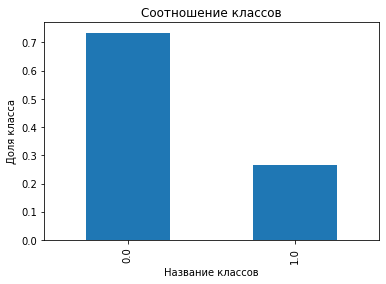

In [56]:
#анализ классов(1 и 0)
class_frequency = data_full_red['ChurnCustomer'].value_counts(normalize=True)
print(class_frequency)
class_frequency.plot(kind='bar')
plt.title('Соотношение классов')
plt.xlabel('Название классов')
plt.ylabel('Доля класса')

# Шаг 2.1 Выводы     
    
1) Разделил данные на три выборки: тестовую, валидационную и обучающую.       
2) Соотношение классов получается 1 к 3 (26% к 74%)      
3) Выборки были получены на данных при прямом и порядковом кодировании, в последствии эти данные будут использованы в логичестической модели.  

# Шаг 2.2 Обучение моделей с различными методами балансировки классов

In [57]:
#определение лучших гиперпараметров для модели - случайный лес

#model_for = RandomForestClassifier()
#parametrs = {'criterion': ['gini', 'entropy'], 'max_depth': range(1,13), 'n_estimators': range(1, 81, 5)}
#grid_search = GridSearchCV(model_for, parametrs, cv=5)
#grid_search.fit(features_train, target_train)
#grid_search.best_params_

In [58]:
#метод сбалансирования классов (случайный лес)
model_for = RandomForestClassifier(random_state=12345, class_weight='balanced', criterion='entropy', max_depth=7, n_estimators=16)
model_for.fit(features_train, target_train)
predicted_valid_for = model_for.predict(features_valid)

print("F1_сбалансирование классов_случаный_лес:", f1_score(target_valid, predicted_valid_for))

#вывод AUC-ROC для сбалансирования классов_случаный_лес
probabilities_valid_for = model_for.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid_for[:, 1]
auc_roc_for = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC для сбалансирования классов_случаный_лес', auc_roc_for)



F1_сбалансирование классов_случаный_лес: 0.6586169045005489
AUC-ROC для сбалансирования классов_случаный_лес 0.8602075036679941


In [59]:
#определение лучших гиперпараметров для модели
#model_tree = DecisionTreeClassifier()
#parametrs = {'criterion': ['gini', 'entropy'], 'max_depth': range(1,15), 'min_samples_split': range(2, 12)}
#grid_search = GridSearchCV(model_tree, parametrs, cv=5)
#grid_search.fit(features_train, target_train)
#grid_search.best_params_

In [60]:
#метод сбалансирования классов (дерево решений)
model_tree = DecisionTreeClassifier(random_state=12345, class_weight='balanced', criterion='entropy',max_depth=4 ,min_samples_split=2)
model_tree.fit(features_train, target_train)
predicted_valid_tree = model_tree.predict(features_valid)

print("F1_сбалансирование классов_дерево_решений:", f1_score(target_valid, predicted_valid_tree))

#вывод AUC-ROC для сбалансирования классов_случаный_лес
probabilities_valid_tree = model_tree.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid_tree[:, 1]
auc_roc_tree = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC для сбалансирования классов_случаный_лес', auc_roc_tree)

F1_сбалансирование классов_дерево_решений: 0.6013320647002854
AUC-ROC для сбалансирования классов_случаный_лес 0.8358598826241879


In [61]:
#метод сбалансирования классов (логистическая регрессия) при порядковом кодировании
model_log = LogisticRegression(random_state=12345, class_weight='balanced')
model_log.fit(features_train, target_train)
predicted_valid_log = model_log.predict(features_valid)

print("F1_сбалансирование классов_логистическая_регрессия:", f1_score(target_valid, predicted_valid_log))

#вывод AUC-ROC для сбалансирования классов_случаный_лес
probabilities_valid_log = model_log.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid_log[:, 1]
auc_roc_log = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC для сбалансирования классов_случаный_лес', auc_roc_log)

F1_сбалансирование классов_логистическая_регрессия: 0.6150627615062761
AUC-ROC для сбалансирования классов_случаный_лес 0.8479642632571788


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [62]:
#метод сбалансирования классов (логистическая регрессия) при прямом кодировании
model_log = LogisticRegression(random_state=12345, class_weight='balanced')
model_log.fit(features_train_dir, target_train_dir)
predicted_valid_log_dir = model_log.predict(features_valid_dir)

print("F1_сбалансирование классов_логистическая_регрессия:", f1_score(target_valid_dir, predicted_valid_log_dir))

#вывод AUC-ROC для сбалансирования классов_случаный_лес
probabilities_valid_log_dir = model_log.predict_proba(features_valid_dir)
probabilities_one_valid_dir = probabilities_valid_log_dir[:, 1]
auc_roc_log_dir = roc_auc_score(target_valid_dir, probabilities_one_valid_dir)
print('AUC-ROC для сбалансирования классов_случаный_лес', auc_roc_log_dir)

F1_сбалансирование классов_логистическая_регрессия: 0.6257928118393234
AUC-ROC для сбалансирования классов_случаный_лес 0.8502908195346887


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [63]:
#метод увеличения выборки
def upsample(features, target, repeat):
    features_zeros = features_train[target_train == 0]
    features_ones = features_train[target_train == 1]
    target_zeros = target_train[target_train == 0]
    target_ones = target_train[target_train == 1]
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 3)

#обучение модели с использованием метода увеличения выборки
model_for_up = RandomForestClassifier(random_state=12345, criterion='entropy', max_depth=7, n_estimators=16)
model_for_up.fit(features_upsampled, target_upsampled)
predicted_valid = model_for_up.predict(features_valid)
f1_ups = f1_score(target_valid, predicted_valid)

print("F1_увеличение выборки:", f1_ups)


#вывод AUC-ROC для метода "увеличение выборки"
probabilities_valid_for_up = model_for_up.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid_for_up[:, 1]
auc_roc_ups = roc_auc_score(target_valid, probabilities_one_valid)

print('AUC-ROC для метода "увеличение выборки"', auc_roc_ups)

F1_увеличение выборки: 0.6362672322375398
AUC-ROC для метода "увеличение выборки" 0.8578481974428842


In [64]:
#метод уменьшения выборки
def downsample(features, target, fraction):
    features_zeros = features_train[target_train == 0]
    features_ones = features_train[target_train == 1]
    target_zeros = target_train[target_train == 0]
    target_ones = target_train[target_train == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.33)

#обучение модели с использованием метода уменьшение выборки
model_for_do = RandomForestClassifier(random_state=12345, criterion='entropy', max_depth=7, n_estimators=16)
model_for_do.fit(features_downsampled, target_downsampled)
predicted_valid = model_for_do.predict(features_valid)
f1_do = f1_score(target_valid, predicted_valid)

print("F1_уменьшение выборки:", f1_do)

#вывод AUC-ROC для метода "уменьшение выборки"
probabilities_valid_for_do = model_for_do.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid_for_do[:, 1]
auc_roc_do = roc_auc_score(target_valid, probabilities_one_valid)

print('AUC-ROC для метода "уменьшение выборки"', auc_roc_do)

F1_уменьшение выборки: 0.6246305418719211
AUC-ROC для метода "уменьшение выборки" 0.8533981345629847


In [65]:
#таблица с общими результатами
ml = ['Случайный лес', 'Дерево решений', 'Логистическая регрессия (поряд. код)', 'Логистическая регрессия (прямое код)', 
      'Увеличение выборки', 'Уменьшение выборки']
data = {
  'F1':  [f1_score(target_valid, predicted_valid_for), f1_score(target_valid, predicted_valid_tree), 
          f1_score(target_valid, predicted_valid_log), f1_score(target_valid_dir, predicted_valid_log_dir), 
          f1_ups, f1_do],
  'AUC-ROC':  [auc_roc_for, auc_roc_tree, auc_roc_log, auc_roc_log_dir, auc_roc_ups, auc_roc_do]
}
data_ml = pd.DataFrame(data=data, index=ml)
display(data_ml)

,F1,AUC-ROC
Случайный лес,0.658617,0.860208
Дерево решений,0.601332,0.835860
Логистическая регрессия (поряд. код),0.615063,0.847964
Логистическая регрессия (прямое код),0.625793,0.850291
Увеличение выборки,0.636267,0.857848
Уменьшение выборки,0.624631,0.853398


# Шаг 2.2 Выводы    

1) Проверил три модели: дерево решений, лог. регрессию и случайный лес. Всех лучше проявила себя модель - случаный лес!).    
2) Наилучшая модель с гиперпараметрами: {'criterion': 'entropy', 'max_depth': 7, 'n_estimators': 16} при сбалансировании классов. Ту же модель и возьмем для методов увеличения и уменьшения выборки.     
3) Самый лучший метод для учета дисбаланса это - сбалансирование классов.     

# Шаг 3 Тестирование модели

In [66]:
#подготовка тестовый выборки
features_test = data_test.drop(['ChurnCustomer'], axis=1)
target_test = data_test['ChurnCustomer']

#подготовка валидационной и обучающей выборки
features = data_val_train.drop(['ChurnCustomer'], axis=1)
target = data_val_train['ChurnCustomer']

In [67]:
#масштабирование признаков
num = ['MonthlyCharges', 'TotalCharges', 'TermOfCooperation']

scaler = StandardScaler()
scaler.fit(features_train[num])

features[num] = scaler.transform(features[num])
features_test[num] = scaler.transform(features_test[num])

In [68]:
#метод сбалансирования классов (случайный лес)
model_for_fin = RandomForestClassifier(random_state=12345, class_weight='balanced', criterion='entropy', max_depth=7, n_estimators=16)
model_for_fin.fit(features, target)
predicted_test_for = model_for_fin.predict(features_test)

print("F1_сбалансирование классов_случаный_лес:", f1_score(target_test, predicted_test_for))

#вывод AUC-ROC для сбалансирования классов_случаный_лес
probabilities_test_for = model_for_fin.predict_proba(features_test)
probabilities_one_test = probabilities_test_for[:, 1]
auc_roc = roc_auc_score(target_test, probabilities_one_test)
print('AUC-ROC для сбалансирования классов_случаный_лес', auc_roc)

F1_сбалансирование классов_случаный_лес: 0.6424759871931698
AUC-ROC для сбалансирования классов_случаный_лес 0.8665731355967334


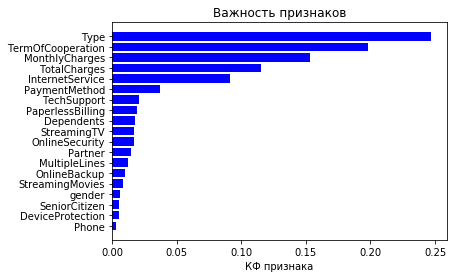

In [69]:
#построение графика важности фич в модели
name_features = features_test.columns
importance = model_for.feature_importances_
indices = np.argsort(importance)

    
plt.title('Важность признаков')
plt.barh(range(len(indices)), importance[indices], color='b', align='center')
plt.yticks(range(len(indices)), [name_features[i] for i in indices])
plt.xlabel('КФ признака')
plt.show()

In [70]:
print('Матрица ошибок') 
print(confusion_matrix(target_test, predicted_test_for))

Матрица ошибок
[[770 262]
 [ 73 301]]


In [71]:
print('Accuracy', (confusion_matrix(target_test, predicted_test_for)[0][0] + 
                  confusion_matrix(target_test, predicted_test_for)[1][1]) / target_test.shape)

Accuracy [0.76173542]


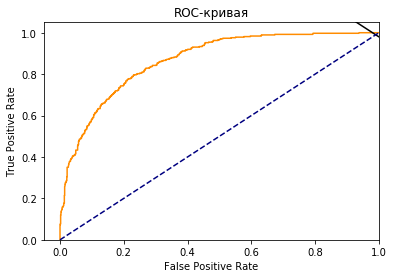

In [72]:
#построение графика ROC-AUC
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)
plt.figure()
plt.plot(fpr, tpr, color='darkorange')
plt.plot(thresholds, color='black')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

# Шаг 3 Выводы    

1) Перед финальным тестированием разделил данные заново, но уже на 2 выборки,а не на три как первоначально.    
2) Итоговая модель дает неплохие результаты: F1 - 0.64 и AUC-ROC - 0.866, не идеально - но работать можно!)        

# Общие выводы

1) Работа заключалась в следующем: подготовить модель для предсказания оттока клиентов из клиенсткой базы, что было сделано: 
- Было предоставлено 4 базы с различным наполнением (данные контракта клиента, услуга по интернету, услуга по телефону, данные по клиентам)
- 4 таблицы были проверены на наличие пропущенных значений, в одном из таблицы были выявлены пустые значения - эти строки были удалены (их было всего лишь 11 штук) 
- Для обучения моделей таблицы были соединены в одну общую таблицу.       

2) Категориальные данные в новой таблице были закодированы, а количественные данные были отмасшабированы.   
3) Был проведен анализ различных моделей, подробные результаты моделей представлены в выводе по шагу 2.2.  
4) По обучающим данным лучше всего себя показала модель - логистическая регрессия на данных закодированных прямым методом, но на тестовых данных эта модель показала результат хуже, чем случайный лес. В связи с этим финально лучшая модель - случайный лес.     
Финальный результат - F1 - 0.62 и AUC-ROC - 0.853     
Самые важные признаки для модели: 'Type', 'TermOfCooperation', 'MonthlyCharges'    
5) Accuracy финальной модели получилось - 75%, Если мы берем во внимание что дисбаланс классов 1 к 3, наша модель по точности идентична, если мы всем клиентам проставим значение "0"(((